In [16]:
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [31]:
#Dataset original:
df = pd.read_csv("Life Expectancy Data Europe Recodificado.csv")
df.dropna(axis='rows', how='all', inplace=True) # Borra las filas que tengan todos los valores faltantes
df

Country  Year  Status  Life expectancy  Adult Mortality  Alcohol  \
0    Austria  2000       0             78.1               94    13.20   
1    Austria  2001       0             78.6               90    12.40   
2    Austria  2002       0             78.7               87    12.50   
3    Austria  2003       0             78.8               86    12.20   
4    Austria  2004       0             79.3               84    12.10   
..       ...   ...     ...              ...              ...      ...   
411   Sweden  2011       0             81.7               58     7.40   
412   Sweden  2012       0             81.7               56     7.40   
413   Sweden  2013       0             81.9               56     7.30   
414   Sweden  2014       0             82.3               55     7.30   
415   Sweden  2015       0             82.4               54     7.13   

     Percentage expenditure   BMI  Under-five deaths  Total expenditure  \
0                   2269.13  51.0                  0               1.60   
1                   2282.52  56.0                  0               1.12   
2                   2497.87  51.2                  0               1.27   
3                   3091.24  51.7                  0               1.48   
4                   3594.65  52.2                  0               1.56   
..                      ...   ...                ...                ...   
411                 6351.22  57.7                  0              11.70   
412                 6254.44  58.1                  0              11.80   
413                 6696.87  58.5                  0              11.97   
414                 6605.91  59.0                  0              11.93   
415                 5598.68  59.5                  0              10.80   

             GDP  Population  Thinness 1-19 years  Thinness 5-9 years  \
0    24517.26745      811566                  1.7                 1.9   
1    24489.73553      842293                  1.7                 1.9   
2    26351.37568      881957                  1.7                 1.9   
3     3212.93550     8121423                  1.7                 1.9   
4    36693.42620     8171966                  1.7                 1.9   
..           ...         ...                  ...                 ...   
411  59593.28711     9449213                  1.4                 1.3   
412  57134.77700     9519374                  1.4                 1.3   
413   6283.24522       96379                  1.4                 1.3   
414   5918.19898      969611                  1.5                 1.3   
415   5585.25847     9799186                  1.5                 1.4   

     Income composition of resources  Schooling  Average temperature  \
0                              0.833       15.4                 7.99   
1                              0.837       15.5                 7.04   
2                              0.847       16.1                 7.74   
3                              0.837       14.7                 7.37   
4                              0.841       14.7                 6.77   
..                               ...        ...                  ...   
411                            0.901       16.0                 4.01   
412                            0.903       15.8                 2.54   
413                            0.904       15.8                 3.37   
414                            0.906       15.8                 4.23   
415                            0.909       15.9                 3.97   

     CO2 Emissions  Cholesterol  Smoking  
0              7.9          3.9     52.3  
1              8.4          3.9      NaN  
2              8.6          3.9      NaN  
3              9.2          3.8      NaN  
4              9.3          3.8      NaN  
..             ...          ...      ...  
411            4.7          3.3      NaN  
412            4.4          3.3      NaN  
413            4.2          3.3      NaN  
414            4.0          3.3      NaN  
415         

In [32]:
#Recodificación de la columna Population:

def poblacion_recod(column):
    column['Poblacion Recod'] = (column['Population'] // 1000)
    return column

df2 = df.apply(poblacion_recod, axis='columns')
df2 = df2.drop('Population', axis=1)
df2.head()

Country  Year  Status  Life expectancy  Adult Mortality  Alcohol  \
0  Austria  2000       0             78.1               94     13.2   
1  Austria  2001       0             78.6               90     12.4   
2  Austria  2002       0             78.7               87     12.5   
3  Austria  2003       0             78.8               86     12.2   
4  Austria  2004       0             79.3               84     12.1   

   Percentage expenditure   BMI  Under-five deaths  Total expenditure  \
0                 2269.13  51.0                  0               1.60   
1                 2282.52  56.0                  0               1.12   
2                 2497.87  51.2                  0               1.27   
3                 3091.24  51.7                  0               1.48   
4                 3594.65  52.2                  0               1.56   

           GDP  Thinness 1-19 years  Thinness 5-9 years  \
0  24517.26745                  1.7                 1.9   
1  24489.73553                  1.7                 1.9   
2  26351.37568                  1.7                 1.9   
3   3212.93550                  1.7                 1.9   
4  36693.42620                  1.7                 1.9   

   Income composition of resources  Schooling  Average temperature  \
0                            0.833       15.4                 7.99   
1                            0.837       15.5                 7.04   
2                            0.847       16.1                 7.74   
3                            0.837       14.7                 7.37   
4                            0.841       14.7                 6.77   

   CO2 Emissions  Cholesterol  Smoking  Poblacion Recod  
0            7.9          3.9     52.3              811  
1            8.4          3.9      NaN              842  
2            8.6          3.9      NaN              881  
3            9.2          3.8      NaN             8121  
4            9.3          3.8      NaN             8171

In [33]:
#Crear nuevo dataframe sin la columna "Smoking":

df3= df2.drop('Smoking', axis=1)
df3.head()

Country  Year  Status  Life expectancy  Adult Mortality  Alcohol  \
0  Austria  2000       0             78.1               94     13.2   
1  Austria  2001       0             78.6               90     12.4   
2  Austria  2002       0             78.7               87     12.5   
3  Austria  2003       0             78.8               86     12.2   
4  Austria  2004       0             79.3               84     12.1   

   Percentage expenditure   BMI  Under-five deaths  Total expenditure  \
0                 2269.13  51.0                  0               1.60   
1                 2282.52  56.0                  0               1.12   
2                 2497.87  51.2                  0               1.27   
3                 3091.24  51.7                  0               1.48   
4                 3594.65  52.2                  0               1.56   

           GDP  Thinness 1-19 years  Thinness 5-9 years  \
0  24517.26745                  1.7                 1.9   
1  24489.73553                  1.7                 1.9   
2  26351.37568                  1.7                 1.9   
3   3212.93550                  1.7                 1.9   
4  36693.42620                  1.7                 1.9   

   Income composition of resources  Schooling  Average temperature  \
0                            0.833       15.4                 7.99   
1                            0.837       15.5                 7.04   
2                            0.847       16.1                 7.74   
3                            0.837       14.7                 7.37   
4                            0.841       14.7                 6.77   

   CO2 Emissions  Cholesterol  Poblacion Recod  
0            7.9          3.9              811  
1            8.4          3.9              842  
2            8.6          3.9              881  
3            9.2          3.8             8121  
4            9.3          3.8             8171

Mean Squared Error: 7.0266809060716096
Coefficients: [-0.07294595]
Intercept: 86.17396502425572
R-squared value: 0.6185543105740813


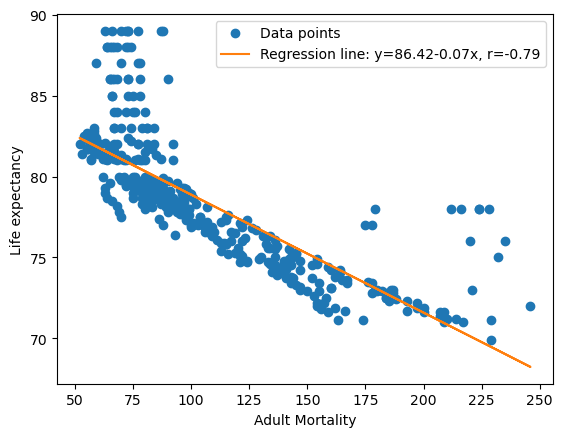

In [34]:
#Regresion lineal sklearn una en una:

X = df2[['Adult Mortality']]
y = df2['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

r2_score = model.score(X, y)
print(f"R-squared value: {r2_score}")

line = f'Regression line: y={intercept:.2f}{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots()
ax.plot(X, y, linewidth=0, marker='o', label='Data points')
ax.plot(X, model.intercept_ + model.coef_ * X, label=line)
ax.set_xlabel('Adult Mortality')
ax.set_ylabel('Life expectancy')
ax.legend(facecolor='white')
plt.show()

Slope: -0.07434717136030065
Intercept: 86.419577051662
Rvalue: -0.78696574430274
Pvalue: 7.476119079332452e-89
Stderr: 0.0028647800660202517
Regression line: y=86.42-0.07x, r=-0.79


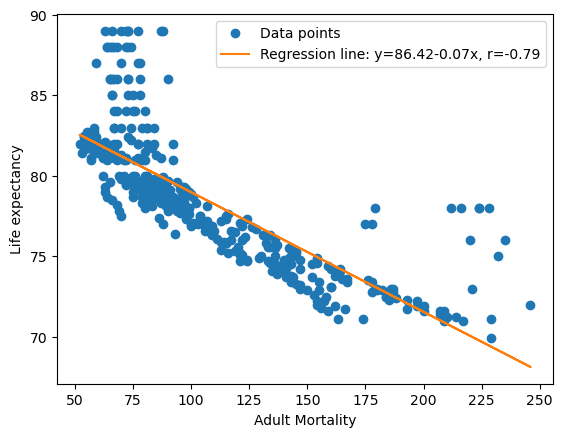

In [29]:
#Regresion lineal de scipy:
X = df2['Adult Mortality']
y = df2['Life expectancy']

result = scipy.stats.linregress(X, y)
print(f'Slope:', result.slope)
print(f'Intercept:', result.intercept)
print(f'Rvalue:', result.rvalue)
print(f'Pvalue:', result.pvalue)
print(f'Stderr:', result.stderr)

slope, intercept, r, p, stderr = scipy.stats.linregress(X, y)
line = f'Regression line: y={intercept:.2f}{slope:.2f}x, r={r:.2f}'
print(line)

fig, ax = plt.subplots()
ax.plot(X, y, linewidth=0, marker='o', label='Data points')
ax.plot(X, intercept + slope * X, label=line)
ax.set_xlabel('Adult Mortality')
ax.set_ylabel('Life expectancy')
ax.legend(facecolor='white')
plt.show()

In [42]:
#Regresion lineal sklearn todas variables menos Smoking:
df_float = pd.get_dummies(df3, columns=['Country'], drop_first=True)

X = df_float.drop('Life expectancy',axis= 1) 
y = df_float['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

r2_score = model.score(X, y)
print(f"R-squared value: {r2_score}")

Mean Squared Error: 4.602672297096102
Coefficients: [ 3.52091232e-01 -1.89918205e+00  1.10010887e-02 -1.30051256e-01
  5.16279642e-04  7.33102261e-02  9.63092583e-01 -1.30283142e-01
  3.08094205e-06  5.18915961e+00 -3.82033990e+00 -1.31912536e+00
  9.09802129e-02  5.77151114e-02 -2.40545923e-02  2.10721302e+00
 -1.10268672e-05 -1.63665008e+00 -1.06543435e+01 -5.52112456e+00
 -4.70282902e+00 -3.70180831e+00 -4.79659947e+00  7.31272142e-01
 -1.76374043e-01 -3.59096748e+00  2.34251933e+00 -9.55517829e+00
 -2.48923019e-01 -6.11158738e-02 -1.02684551e+01 -1.18283736e+01
 -1.15403970e+00 -1.14535068e+00 -1.39947940e+00 -8.36840399e+00
 -1.37292428e+00 -1.13386656e+01 -5.69430487e+00 -1.26477428e+00
 -2.94241838e-01  1.30644439e+00]
Intercept: -639.7872054678386
R-squared value: 0.7806475340624572
